# Basic working examples of parameter estimation

In [1]:
using Distributed
addprocs(8)

@everywhere begin
    using DifferentialEquations
    using Thyrosim
    using DiffEqCallbacks
    using DiffEqParamEstim
    using SharedArrays
end

using Plots
using Optim

┌ Info: Recompiling stale cache file /Users/biona001/.julia/compiled/v1.2/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1240


      From worker 2:	┌ Warning: The call to compilecache failed to create a usable precompiled cache file for RecursiveArrayTools [731186ca-8d62-57ce-b412-fbd966d074cd]
      From worker 2:	│   exception = Required dependency StaticArrays [90137ffa-7385-5640-81b9-e52037218182] failed to load from a cache file.
      From worker 2:	└ @ Base loading.jl:1025
      From worker 5:	┌ Warning: The call to compilecache failed to create a usable precompiled cache file for RecursiveArrayTools [731186ca-8d62-57ce-b412-fbd966d074cd]
      From worker 5:	│   exception = Required dependency StaticArrays [90137ffa-7385-5640-81b9-e52037218182] failed to load from a cache file.
      From worker 5:	└ @ Base loading.jl:1025
      From worker 9:	┌ Warning: The call to compilecache failed to create a usable precompiled cache file for RecursiveArrayTools [731186ca-8d62-57ce-b412-fbd966d074cd]
      From worker 9:	│   exception = Required dependency StaticArrays [90137ffa-7385-5640-81b9-e52037218182] failed

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = Required dependency NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] failed to load from a cache file.
└ @ Base loading.jl:1025
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = Required dependency NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] failed to load from a cache file.
└ @ Base loading.jl:1025
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = Required dependency NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] failed to load from a cache file.
└ @ Base loading.jl:1025
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquat

      From worker 4:	┌ Warning: Module OrdinaryDiffEq with build ID 165198172108001 is missing from the cache.
      From worker 4:	│ This may mean OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed] does not support precompilation but is imported by a module that does.
      From worker 4:	└ @ Base loading.jl:1000
      From worker 5:	┌ Warning: Module OrdinaryDiffEq with build ID 165198523265293 is missing from the cache.
      From worker 5:	│ This may mean OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed] does not support precompilation but is imported by a module that does.
      From worker 5:	└ @ Base loading.jl:1000
      From worker 4:	┌ Warning: Module DiffEqBase with build ID 165171895401637 is missing from the cache.
      From worker 4:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 4:	└ @ Base loading.jl:1000
      From worker 5:	┌ Warning: Module DiffEqBase w

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e]
│   exception = Required dependency MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] failed to load from a cache file.
└ @ Base loading.jl:1025
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e]
│   exception = Required dependency MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] failed to load from a cache file.
└ @ Base loading.jl:1025
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e]
│   exception = Required dependency MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] failed to load from a cache file.
└ @ Base loading.jl:1025
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e]
│   excep

      From worker 3:	┌ Warning: Module DiffEqBase with build ID 165290535595452 is missing from the cache.
      From worker 3:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 3:	└ @ Base loading.jl:1000
      From worker 2:	┌ Warning: Module DiffEqBase with build ID 165290575687118 is missing from the cache.
      From worker 2:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 2:	└ @ Base loading.jl:1000
      From worker 6:	┌ Warning: Module DiffEqBase with build ID 165290609657826 is missing from the cache.
      From worker 6:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 6:	└ @ Base loading.jl:1000
      From worker 7:	┌ Warning: Module DiffEqBase with build ID 165

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for SteadyStateDiffEq [9672c7b4-1e72-59bd-8a11-6ac3964bc41f]
│   exception = Required dependency NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] failed to load from a cache file.
└ @ Base loading.jl:1025


      From worker 3:	┌ Warning: Module DiffEqBase with build ID 165290535595452 is missing from the cache.
      From worker 3:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 3:	└ @ Base loading.jl:1000
      From worker 8:	┌ Warning: Module DiffEqBase with build ID 165290621073758 is missing from the cache.
      From worker 8:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 8:	└ @ Base loading.jl:1000
      From worker 2:	┌ Warning: Module DiffEqBase with build ID 165290575687118 is missing from the cache.
      From worker 2:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 2:	└ @ Base loading.jl:1000
      From worker 6:	┌ Warning: Module DiffEqBase with build ID 165

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for SteadyStateDiffEq [9672c7b4-1e72-59bd-8a11-6ac3964bc41f]
│   exception = Required dependency DiffEqCallbacks [459566f4-90b8-5000-8ac3-15dfb0a30def] failed to load from a cache file.
└ @ Base loading.jl:1025


      From worker 4:	┌ Warning: Module OrdinaryDiffEq with build ID 165373252766568 is missing from the cache.
      From worker 4:	│ This may mean OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed] does not support precompilation but is imported by a module that does.
      From worker 4:	└ @ Base loading.jl:1000
      From worker 5:	┌ Warning: Module OrdinaryDiffEq with build ID 165386918282730 is missing from the cache.
      From worker 5:	│ This may mean OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed] does not support precompilation but is imported by a module that does.
      From worker 5:	└ @ Base loading.jl:1000
      From worker 4:	┌ Warning: Module StochasticDiffEq with build ID 165407931655617 is missing from the cache.
      From worker 4:	│ This may mean StochasticDiffEq [789caeaf-c7a9-5a7d-9973-96adeb23e2a0] does not support precompilation but is imported by a module that does.
      From worker 4:	└ @ Base loading.jl:1000
      From worker 5:	┌ Warning: Module 

┌ Info: Recompiling stale cache file /Users/biona001/.julia/compiled/v1.2/Thyrosim/Oo7R6.ji for Thyrosim [7ef34fca-2b35-11e9-1aeb-a527bedb189e]
└ @ Base loading.jl:1240
┌ Warning: Module VersionParsing with build ID 164844497691638 is missing from the cache.
│ This may mean VersionParsing [81def892-9a0e-5fdd-b105-ffc91e053289] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module VersionParsing with build ID 164844497691638 is missing from the cache.
│ This may mean VersionParsing [81def892-9a0e-5fdd-b105-ffc91e053289] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module VersionParsing with build ID 164844497691638 is missing from the cache.
│ This may mean VersionParsing [81def892-9a0e-5fdd-b105-ffc91e053289] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module VersionParsing with build ID 164844497691638 

      From worker 8:	┌ Warning: Module VersionParsing with build ID 165490611904287 is missing from the cache.
      From worker 8:	│ This may mean VersionParsing [81def892-9a0e-5fdd-b105-ffc91e053289] does not support precompilation but is imported by a module that does.
      From worker 8:	└ @ Base loading.jl:1000
      From worker 2:	┌ Warning: Module VersionParsing with build ID 165490884174815 is missing from the cache.
      From worker 2:	│ This may mean VersionParsing [81def892-9a0e-5fdd-b105-ffc91e053289] does not support precompilation but is imported by a module that does.
      From worker 2:	└ @ Base loading.jl:1000
      From worker 8:	┌ Warning: Module MacroTools with build ID 165158344655012 is missing from the cache.
      From worker 8:	│ This may mean MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] does not support precompilation but is imported by a module that does.
      From worker 8:	└ @ Base loading.jl:1000
      From worker 2:	┌ Warning: Module MacroTools w

┌ Info: Precompiling DiffEqParamEstim [1130ab10-4a5a-5621-a13d-e4788d82bd4c]
└ @ Base loading.jl:1242
┌ Warning: Module DiffEqBase with build ID 164910474842763 is missing from the cache.
│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Skipping precompilation since __precompile__(false). Importing DiffEqParamEstim [1130ab10-4a5a-5621-a13d-e4788d82bd4c].
└ @ Base loading.jl:1017
┌ Info: Recompiling stale cache file /Users/biona001/.julia/compiled/v1.2/LsqFit/GCdY9.ji for LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1240
┌ Warning: Module DataStructures with build ID 164916987816384 is missing from the cache.
│ This may mean DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module DataStructures with build ID 164916987816384 is missing fr

      From worker 6:	┌ Warning: Module DiffEqBase with build ID 165290609657826 is missing from the cache.
      From worker 6:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 6:	└ @ Base loading.jl:1000
      From worker 9:	┌ Warning: Module DiffEqBase with build ID 165290675467018 is missing from the cache.
      From worker 9:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 9:	└ @ Base loading.jl:1000
      From worker 2:	┌ Warning: Module DiffEqBase with build ID 165290575687118 is missing from the cache.
      From worker 2:	│ This may mean DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e] does not support precompilation but is imported by a module that does.
      From worker 2:	└ @ Base loading.jl:1000
      From worker 7:	┌ Warning: Module DiffEqBase with build ID 165

┌ Info: Recompiling stale cache file /Users/biona001/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Warning: Module StaticArrays with build ID 164911400840839 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module StaticArrays with build ID 164911400840839 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1017
┌ Info: Precompiling GeometryTypes [4d00f742-c7ba-57c2-abde-4428a4b178cb]
└ @ Base loading.jl:1242
┌ Warning: Module StaticArrays with build ID 164911400840839 is missing from the cache.
│ Th

      From worker 5:	┌ Warning: Module NLSolversBase with build ID 165191908283145 is missing from the cache.
      From worker 5:	│ This may mean NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] does not support precompilation but is imported by a module that does.
      From worker 5:	└ @ Base loading.jl:1000
      From worker 4:	┌ Warning: Module NLSolversBase with build ID 165191908283145 is missing from the cache.
      From worker 4:	│ This may mean NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] does not support precompilation but is imported by a module that does.
      From worker 4:	└ @ Base loading.jl:1000
      From worker 9:	┌ Warning: Module NLSolversBase with build ID 165191908283145 is missing from the cache.
      From worker 9:	│ This may mean NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] does not support precompilation but is imported by a module that does.
      From worker 9:	└ @ Base loading.jl:1000
      From worker 3:	┌ Warning: Module NLSolversB

## Import data and initial conditions

In [2]:
train, test, toy = schneider_data();

In [3]:
# useful parameters
train[!, Symbol("Days.to.euthyroid")]
train[!, Symbol("Wt.kg")]
train[!, Symbol("Ht.m")]
train[!, Symbol("TSH.preop")]
train[!, Symbol("Dose.changes")]
train[!, Symbol("LT4.euthyroid.dose")]
train[!, Symbol("LT4.initial.dose")]
train[!, Symbol("Sex")];

## Solve 1 schneider patient

In [4]:
# each row is a patient's tspan
total_days = train[!, Symbol("Days.to.euthyroid")]
tspans = [(0.0, 24.0total_days[i]) for i in 1:length(total_days)]

400-element Array{Tuple{Float64,Float64},1}:
 (0.0, 1320.0) 
 (0.0, 2376.0) 
 (0.0, 5208.0) 
 (0.0, 4296.0) 
 (0.0, 3864.0) 
 (0.0, 3744.0) 
 (0.0, 4560.0) 
 (0.0, 1032.0) 
 (0.0, 2424.0) 
 (0.0, 3720.0) 
 (0.0, 2136.0) 
 (0.0, 1656.0) 
 (0.0, 5376.0) 
 ⋮             
 (0.0, 6744.0) 
 (0.0, 2208.0) 
 (0.0, 3792.0) 
 (0.0, 1896.0) 
 (0.0, 336.0)  
 (0.0, 1416.0) 
 (0.0, 2208.0) 
 (0.0, 1080.0) 
 (0.0, 10224.0)
 (0.0, 5904.0) 
 (0.0, 2424.0) 
 (0.0, 4008.0) 

In [5]:
# initialize ODE problem
ic, p = initialize([0.0; 0.88; 0.0; 0.88]) # schneider patients are completely thyroidectomized

# designate p55 as oral T4 dose (400 mcg), p56 as oral T3 dose
p[55] = 175.0 / 777.0
p[56] = 0.0

# call back function for adding dose every 24 hour
function add_dose!(integrator)
    integrator.u[10] += integrator.p[55]
    integrator.u[12] += integrator.p[56]
end
cbk = PeriodicCallback(add_dose!, 24.0);

# define ODE problem
train_patient_1 = ODEProblem(thyrosim,ic,tspans[1],p,callback=cbk)
    
# solve ODE problem
sol = solve(train_patient_1);

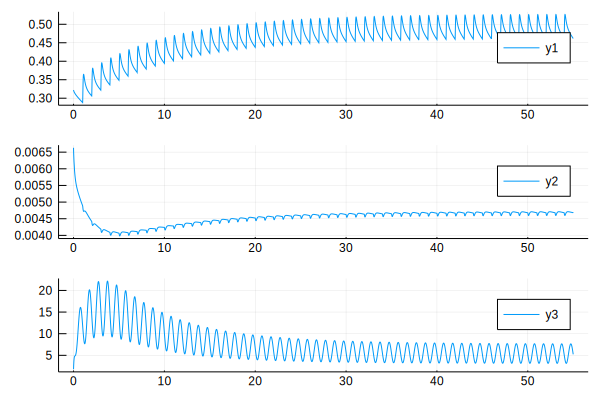

In [6]:
# T4, T3, TSH
plot(sol.t ./ 24, [sol[1, :] sol[4, :] sol[7, :]], layout = (3, 1))

# Define error function for all Schneider patients

We simulate patients according to the number of days the patient achieved euthyrodism using the given dose, then calculate if their TSH levels are within [0.45, 4.5] mIU/ml.

#### Parameter definition:
- `p[55]:` Daily T4 oral dose
- `p[56]:` Daily T3 oral dose

#### Error definition:
+ When given an euthyroid T4 dose, if any TSH values $\notin [0.5, 4.5]$ in the last 24h of simulation, then error + 1 (i.e. **patients receiving correct dose should have normal TSH**)
+ When given the initial T4 dose, if the initial T4 dose is not equal to euthyroid T4 dose, and all TSH values $\in [0.5, 4.5]$, then error + 1 (i.e. **patients not receiving correct dose should NOT have normal TSH**)

In [7]:
# define function for adding dose
@everywhere function add_dose!(integrator)
    integrator.u[10] += integrator.p[55]
    integrator.u[12] += integrator.p[56]
end

In [8]:
function compute_schneider_error_single_thread(train_data)    
    dial = [0.0; 0.88; 0.0; 0.88]
    scale_Vp = true
    tot_loss = 0
    cbk = PeriodicCallback(add_dose!, 24.0);

    #loop over all patients
    for i in 1:size(train_data, 1)
        height = train_data[i, Symbol("Ht.m")]
        weight = train_data[i, Symbol("Wt.kg")]
        sex    = Bool(train_data[i, Symbol("Sex")])
        ic, p  = initialize(dial, scale_Vp, height, weight, sex) #initializes ic and p
        ic[7]  = train_data[i, Symbol("TSH.preop")] #set initial TSH value
        tspan  = (0.0, 24.0train_data[i, Symbol("Days.to.euthyroid")]) #(0, total hours)
        
        # calculate error for euthyroid dose
        euthyroid_dose = train_data[i, Symbol("LT4.euthyroid.dose")] / 777.0
        p[55] = euthyroid_dose
        prob  = ODEProblem(thyrosim,ic,tspan,p,callback=cbk)
        sol   = solve(prob, save_idxs=7)
        tot_loss += compute_euthyroid_dose_error(sol)
        
        # when initial dose != euthyroid dose, calculate error
        initial_dose = train_data[i, Symbol("LT4.initial.dose")] / 777.0
        if initial_dose != euthyroid_dose
            p[55] = initial_dose
            prob  = ODEProblem(thyrosim,ic,tspan,p,callback=cbk)
            sol   = solve(prob, save_idxs=7)
            tot_loss += compute_initial_dose_error(sol)
        end
    end
    
    return tot_loss
end

compute_schneider_error_single_thread (generic function with 1 method)

### Parallel version of previous function using the Distributed package

In [9]:
@everywhere function one_simulation(
    height::Float64, 
    weight::Float64, 
    sex::Bool,
    tspan::Float64,
    initial_tsh::Float64,
    euthyroid_dose::Float64,
    initial_dose::Float64
    )

    #initialize simulation parameters
    dial = [0.0; 0.88; 0.0; 0.88]
    scale_Vp = true
    ic, p = initialize(dial, scale_Vp, height, weight, sex)
    ic[7] = initial_tsh
    tot_loss = zero(Int)
    cbk = PeriodicCallback(add_dose!, 24.0)# function to add dose

    # calculate error for euthyroid dose
    p[55] = euthyroid_dose / 777.0
    prob  = ODEProblem(thyrosim,ic,(0.0, tspan),p,callback=cbk)
    sol   = solve(prob, save_idxs=7)
    
    #increment error
    tot_loss += compute_euthyroid_dose_error(sol)
    
    # when initial dose != euthyroid dose, increment error
    if initial_dose != euthyroid_dose
        p[55] = initial_dose / 777.0
        prob  = ODEProblem(thyrosim,ic,(0.0, tspan),p,callback=cbk)
        sol   = solve(prob, save_idxs=7)
        tot_loss += compute_initial_dose_error(sol)
    end

    return tot_loss
end

In [10]:
function compute_schneider_error_distributed(train_data)
    n = size(train_data, 1)

    height = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Ht.m")]))
    weight = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Wt.kg")]))
    sex    = SharedArray{Bool}(convert(Vector{Bool}, train_data[!, Symbol("Sex")]))
    tspan  = SharedArray{Float64}(convert(Vector{Float64}, 24train_data[!, Symbol("Days.to.euthyroid")]))
    init_tsh   = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("TSH.preop")]))
    euthy_dose = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.euthyroid.dose")]))
    init_dose  = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.initial.dose")]))

    err = @sync @distributed (+) for i in 1:n
        one_simulation(height[i], weight[i], sex[i], tspan[i], init_tsh[i], euthy_dose[i], init_dose[i])
    end
    
    return err
end

compute_schneider_error_distributed (generic function with 1 method)

### Helper functions for calculating error

These functions assume the solution object contains only TSH values, which can be achieved by using `save_idxs=7` when one call `solve`. 

In [11]:
@everywhere function compute_euthyroid_dose_error(sol)
    tot_loss = 0
    if any((s.retcode != :Success for s in sol))
        tot_loss = Inf
    else
        total_hours  = sol.t[end]
        TSH_last_day = sol.u[sol.t .>= total_hours - 24]
        if !all(0.5 .≤ TSH_last_day .≤ 4.5)
            tot_loss += 1
        end
    end
    return tot_loss
end

@everywhere function compute_initial_dose_error(sol)
    tot_loss = 0
    if any((s.retcode != :Success for s in sol))
        tot_loss = Inf
    else
        total_hours  = sol.t[end]
        TSH_last_day = sol.u[sol.t .>= total_hours - 24]
        if all(0.5 .≤ TSH_last_day .≤ 4.5)
            tot_loss += 1
        end
    end
    return tot_loss
end

## Error and timing on toy and train data (single threaded)

In [12]:
@time compute_schneider_error_single_thread(toy) 

  3.695341 seconds (10.88 M allocations: 580.254 MiB, 7.07% gc time)


15

In [13]:
@time compute_schneider_error_single_thread(train) 

 26.804496 seconds (38.28 M allocations: 3.111 GiB, 2.59% gc time)


394

## Error and timing on toy and train data (distributed computing)

With 8 CPUs, we get ~6 times speed up (on the train dataset)

In [31]:
@time compute_schneider_error_distributed(toy) 

  0.356279 seconds (8.37 k allocations: 357.359 KiB)


15

In [15]:
@time compute_schneider_error_distributed(train) 

  4.924518 seconds (8.58 k allocations: 386.250 KiB)


394

# Optimize error function

+ `current_iter` stores only the parameters that are being optimized. 
+ `p` stores the full parameter vector. It is initialized separately for each patient and contains the parameters in `current_iter`. We update these parameters using `fitting_index`. 

In [16]:
# main objective function
function schneider_objective(
    p_being_optimized::Vector{Float64}, 
    fitting_index::SharedArray, 
    height::SharedArray, 
    weight::SharedArray, 
    sex::SharedArray, 
    tspan::SharedArray, 
    init_tsh::SharedArray, 
    euthy_dose::SharedArray, 
    init_dose::SharedArray
    )
        
    num_params = length(p_being_optimized)
    num_sample = length(height)
    num_params == length(fitting_index) || error("check parameter length bro")
    
    current_iter = SharedArray{Float64}(p_being_optimized)
    err = @sync @distributed (+) for i in 1:num_sample
        one_simulation(current_iter, fitting_index, height[i], weight[i], sex[i], tspan[i], init_tsh[i], euthy_dose[i], init_dose[i])
    end
    return err
end

schneider_objective (generic function with 1 method)

In [17]:
@everywhere function one_simulation(
    current_iter::SharedArray,
    fitting_index::SharedArray, 
    height::Float64, 
    weight::Float64, 
    sex::Bool,
    tspan::Float64,
    initial_tsh::Float64,
    euthyroid_dose::Float64,
    initial_dose::Float64
    )
    
    #initialize simulation parameters
    scale_Vp = true
    dial  = [0.0; 0.88; 0.0; 0.88]
    ic, p = initialize(dial, scale_Vp, height, weight, sex)
    ic[7] = initial_tsh
    tot_loss = zero(Int)
    cbk = PeriodicCallback(add_dose!, 24.0)# function to add dose

    # update parameter for fitting 
    p[fitting_index] .= current_iter
    
    # calculate error for euthyroid dose
    p[55] = euthyroid_dose / 777.0
    prob  = ODEProblem(thyrosim,ic,(0.0, tspan),p,callback=cbk)
    sol   = solve(prob, save_idxs=7)
    
    #increment error
    tot_loss += compute_euthyroid_dose_error(sol)
    
    # when initial dose != euthyroid dose, calculate error
    if initial_dose != euthyroid_dose
        p[55] = initial_dose / 777.0
        prob = ODEProblem(thyrosim,ic,(0.0, tspan),p,callback=cbk)
        sol = solve(prob, save_idxs=7)
        tot_loss += compute_initial_dose_error(sol)
    end

    return tot_loss
end

### Test run

In [18]:
current_iter  = [101; 47.64; 4.57; 3.9; 11.0; 5.0; 3.5; 8.0]
fitting_index = SharedArray{Int}([30; 31; 49; 50; 51; 52; 53; 54])

train_data = toy
height = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Ht.m")]))
weight = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Wt.kg")]))
sex    = SharedArray{Bool}(convert(Vector{Bool}, train_data[!, Symbol("Sex")]))
tspan  = SharedArray{Float64}(convert(Vector{Float64}, 24train_data[!, Symbol("Days.to.euthyroid")]))
init_tsh   = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("TSH.preop")]))
euthy_dose = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.euthyroid.dose")]))
init_dose  = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.initial.dose")]))
    
@time test_err = schneider_objective(current_iter, fitting_index, height, weight, sex, tspan, init_tsh, euthy_dose, init_dose)
@show test_err

train_data = train
height = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Ht.m")]))
weight = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Wt.kg")]))
sex    = SharedArray{Bool}(convert(Vector{Bool}, train_data[!, Symbol("Sex")]))
tspan  = SharedArray{Float64}(convert(Vector{Float64}, 24train_data[!, Symbol("Days.to.euthyroid")]))
init_tsh   = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("TSH.preop")]))
euthy_dose = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.euthyroid.dose")]))
init_dose  = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.initial.dose")]))
    
@time test_err = schneider_objective(current_iter, fitting_index, height, weight, sex, tspan, init_tsh, euthy_dose, init_dose)
@show test_err

  0.768602 seconds (917.84 k allocations: 47.181 MiB, 3.05% gc time)
test_err = 15
  4.622100 seconds (3.65 k allocations: 212.047 KiB)
test_err = 394


394

### Try optimizing schneider_objective

In [19]:
# initialize initial guess and fitting index
initial_guess = [101; 47.64; 4.57; 3.9; 11.0; 5.0; 3.5; 8.0]
fitting_index = SharedArray{Int}([30; 31; 49; 50; 51; 52; 53; 54])

# import data and put in SharedArray
train_data = toy
height = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Ht.m")]))
weight = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Wt.kg")]))
sex    = SharedArray{Bool}(convert(Vector{Bool}, train_data[!, Symbol("Sex")]))
tspan  = SharedArray{Float64}(convert(Vector{Float64}, 24train_data[!, Symbol("Days.to.euthyroid")]))
init_tsh   = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("TSH.preop")]))
euthy_dose = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.euthyroid.dose")]))
init_dose  = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.initial.dose")]))

result = optimize(p -> schneider_objective(p, fitting_index, height, weight, sex, tspan, init_tsh, euthy_dose, init_dose),
                                            initial_guess, NelderMead())

 * Status: success

 * Candidate solution
    Minimizer: [9.38e+01, 4.88e+01, 4.68e+00,  ...]
    Minimum:   1.000000e+01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.01e+02, 4.76e+01, 4.57e+00,  ...]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   59  (vs limit Inf)
    Iterations:    25
    f(x) calls:    208


In [24]:
function fit_schneider(train_data)
    # initialize initial guess and fitting index
    initial_guess = [101; 47.64; 4.57; 3.9; 11.0; 5.0; 3.5; 8.0]
    fitting_index = SharedArray{Int}([30; 31; 49; 50; 51; 52; 53; 54])

    # import data and put in SharedArray
    height = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Ht.m")]))
    weight = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("Wt.kg")]))
    sex    = SharedArray{Bool}(convert(Vector{Bool}, train_data[!, Symbol("Sex")]))
    tspan  = SharedArray{Float64}(convert(Vector{Float64}, 24train_data[!, Symbol("Days.to.euthyroid")]))
    init_tsh   = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("TSH.preop")]))
    euthy_dose = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.euthyroid.dose")]))
    init_dose  = SharedArray{Float64}(convert(Vector{Float64}, train_data[!, Symbol("LT4.initial.dose")]))

    return optimize(p -> schneider_objective(p, fitting_index, height, weight, sex, tspan, init_tsh, euthy_dose, init_dose),
                                            initial_guess, NelderMead())
end

fit_schneider (generic function with 2 methods)

In [32]:
train, test, toy = schneider_data()
@time result = fit_schneider(toy)

 55.783955 seconds (715.23 k allocations: 42.627 MiB, 0.04% gc time)


 * Status: success

 * Candidate solution
    Minimizer: [9.38e+01, 4.88e+01, 4.68e+00,  ...]
    Minimum:   1.000000e+01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.01e+02, 4.76e+01, 4.57e+00,  ...]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   52  (vs limit Inf)
    Iterations:    25
    f(x) calls:    208


In [33]:
result.minimum #original was 15

10.0

In [34]:
init_guess = [101; 47.64; 4.57; 3.9; 11.0; 5.0; 3.5; 8.0]
[result.minimizer init_guess]

8×2 Array{Float64,2}:
 93.843    101.0 
 48.7659    47.64
  4.67907    4.57
  3.99325    3.9 
 11.2609    11.0 
  5.88895    5.0 
  4.40913    3.5 
  7.84796    8.0 

# Fitting on full training data

In [ ]:
train, test, toy = schneider_data()
@time result = fit_schneider(train)